In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering,MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sc
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('clustering_data.csv',index_col=0)
df

,carat,carat_encoded,cut_encoded,clarity_encoded,color_encoded,price_per_carat,depth,dim_ratio,volume,table,x,y,z,price
0,0.23,0.0,4.0,1.0,1.0,1417.391304,61.5,1.631687,38.202030,55.0,3.95,3.98,2.43,326
1,0.21,0.0,3.0,2.0,1.0,1552.380952,59.8,1.673160,34.505856,61.0,3.89,3.84,2.31,326
2,0.23,0.0,1.0,4.0,1.0,1421.739130,56.9,1.757576,38.076885,65.0,4.05,4.07,2.31,327
3,0.29,0.0,3.0,3.0,5.0,1151.724138,62.4,1.602662,46.724580,58.0,4.20,4.23,2.63,334
4,0.31,0.0,1.0,1.0,6.0,1080.645161,63.3,1.580000,51.917250,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1.0,4.0,2.0,0.0,3829.166667,60.8,1.644286,115.920000,57.0,5.75,5.76,3.50,2757
53936,0.72,1.0,1.0,2.0,0.0,3829.166667,63.1,1.584488,118.110175,55.0,5.69,5.75,3.61,2757
53937,0.70,1.0,2.0,2.0,0.0,3938.571429,62.8,1.592697,114.449728,60.0,5.66,5.68,3.56,2757
53938,0.86,1.0,3.0,1.0,4.0,3205.813953,61.0,1.640374,140.766120,58.0,6.15,6.12,3.74,2757


In [3]:
df['log_carat']=np.log1p(df['carat'])

In [4]:
features=['log_carat', 'cut_encoded', 'clarity_encoded', 'color_encoded','table','depth','dim_ratio']#'x','y','z','volume','',
X=df[features]

In [5]:
ss=StandardScaler()
af=ss.fit_transform(X)

In [6]:
pca=PCA(n_components=2,random_state=42)
data_pca=pca.fit_transform(af)

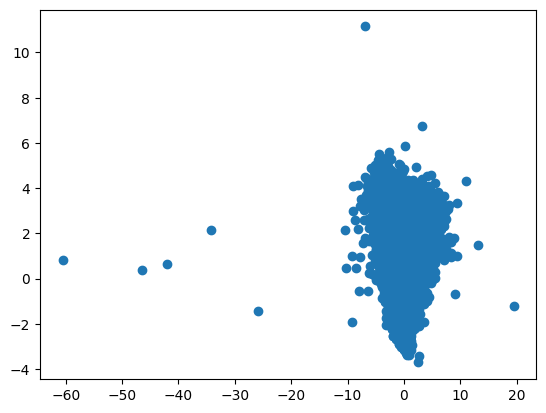

In [7]:
plt.scatter(data_pca[:,0],data_pca[:,1])

In [49]:
wcss=[] # Within Cluster Sum of Squares
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

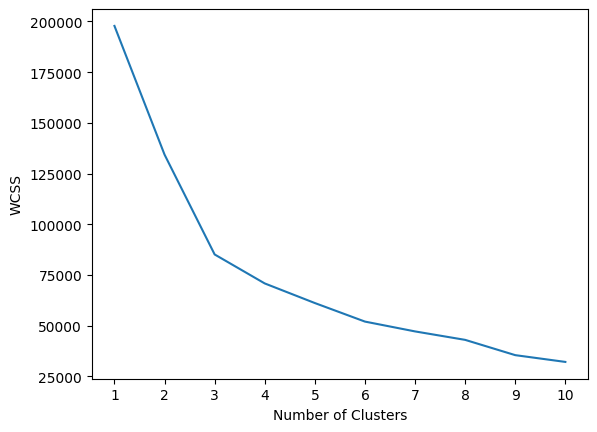

In [50]:
## Plotting Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [51]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [52]:
for i in range(2,9):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data_pca)
    y_train = kmeans.labels_
    print(i,silhouette_score(data_pca,y_train))

2 0.34286641210117347
3 0.40891062142569057
4 0.3458446010808971
5 0.32131749766896445
6 0.3496305721966852
7 0.33551848406050305
8 0.3399925397046953


In [8]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [9]:
kmeans.fit(data_pca)
y_train = kmeans.labels_

In [10]:
centroids=kmeans.cluster_centers_
print('Centroids :\n', centroids)

Centroids :
 [[-0.02689913 -1.1175865 ]
 [-1.61779378  1.05026997]
 [ 1.16268726  0.94186354]]


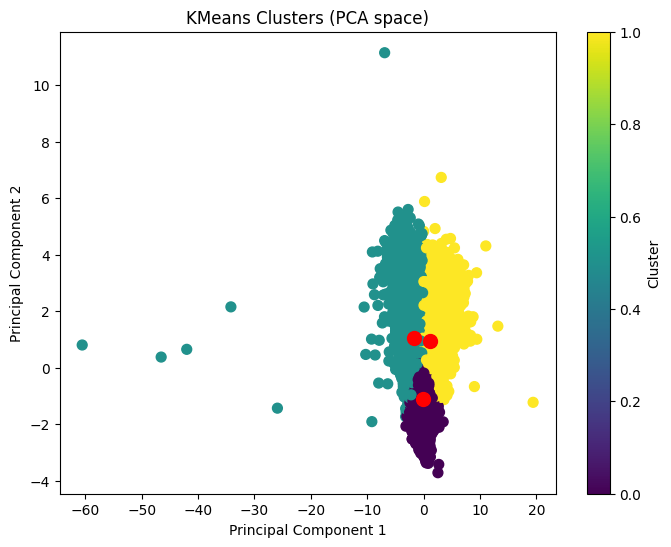

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_train, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title("KMeans Clusters (PCA space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [12]:
print(silhouette_score(data_pca,y_train))

0.40864626365043083


In [59]:
sample_idx = np.random.choice(len(data_pca), size=10000, replace=False)
sample_data = data_pca[sample_idx]
sample_data

array([[ 0.31491263, -0.39991057],
       [ 0.04693959, -1.40838243],
       [-1.16845493,  0.32485896],
       ...,
       [ 0.05810062, -0.80434278],
       [-2.86289003,  2.11207792],
       [ 1.50747654,  0.54277095]])

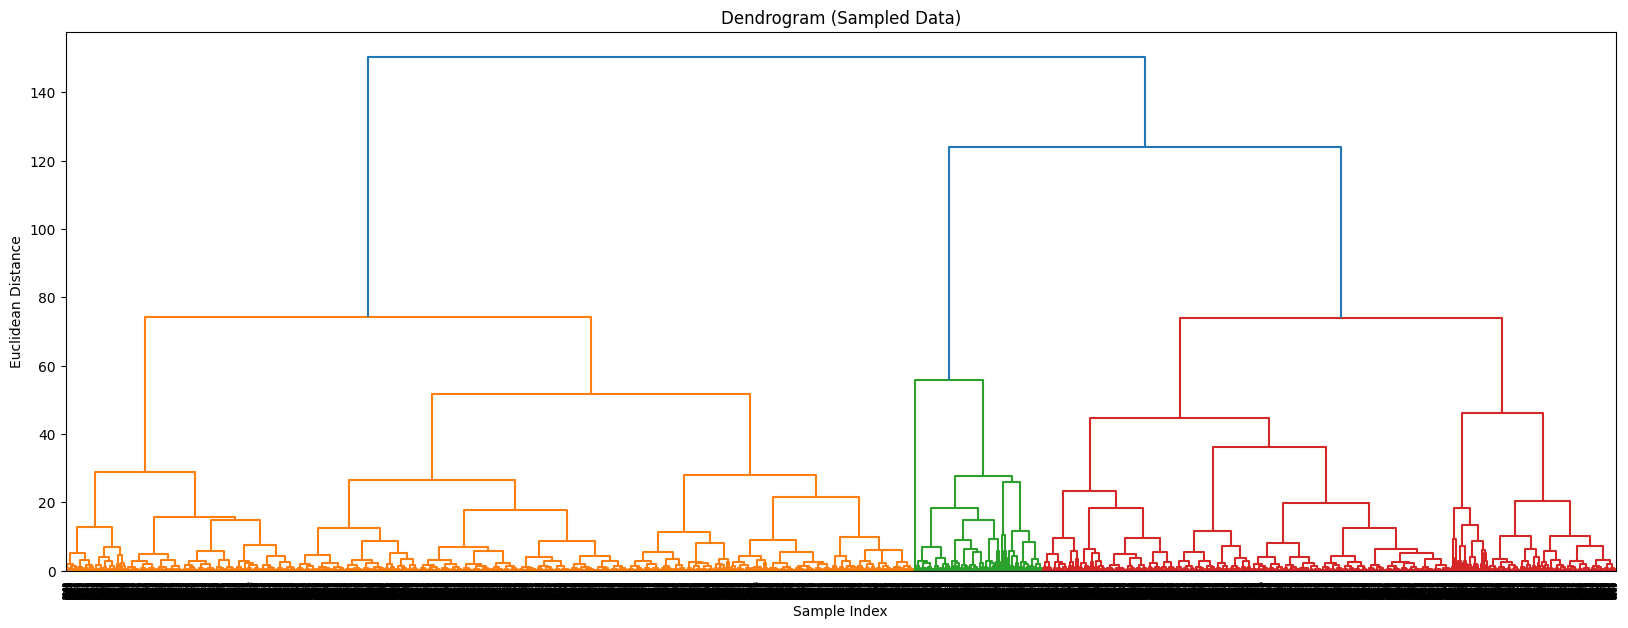

In [60]:
plt.figure(figsize=(20, 7)) 
dend=sc.dendrogram(sc.linkage(sample_data, method='ward'))
#plt.axhline(y=80, color='r', linestyle='--')
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [61]:
cluster=AgglomerativeClustering(distance_threshold=100,n_clusters=None,linkage='ward') #,,linkage='ward',
cluster.fit(sample_data)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,100
,compute_distances,False


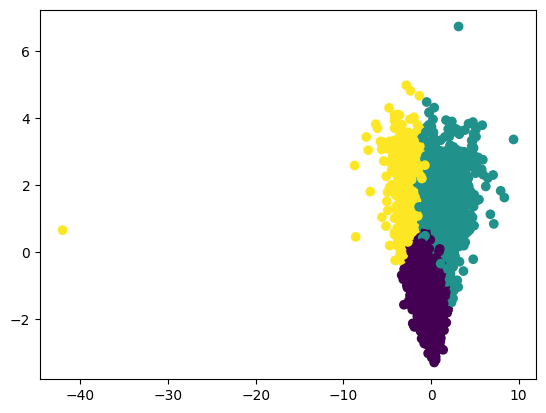

In [62]:
plt.scatter(sample_data[:,0],sample_data[:,1],c=cluster.labels_)

In [63]:
labels=cluster.labels_
score = silhouette_score(sample_data, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.37539849058348085


In [64]:
for i in range(2,7):
    cluster=AgglomerativeClustering(n_clusters=i,linkage='ward') #distance_threshold=60,,linkage='ward',
    cluster.fit(sample_data)
    labels=cluster.labels_
    score = silhouette_score(sample_data, labels)
    print(f"{i}----Silhouette Score: {score}")

2----Silhouette Score: 0.34210357683475207
3----Silhouette Score: 0.37539849058348085
4----Silhouette Score: 0.3041219689979312
5----Silhouette Score: 0.3086540664104947
6----Silhouette Score: 0.30950972767533375


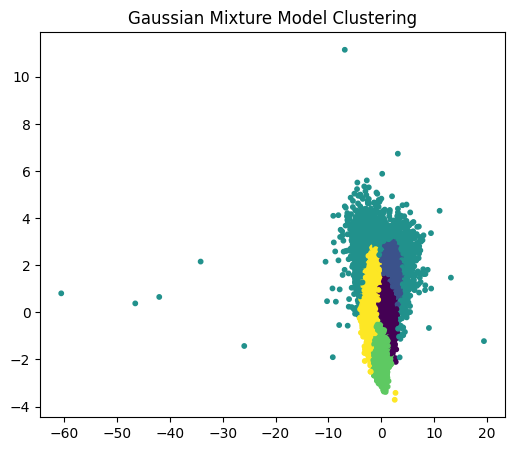

In [65]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type='full')
labels_gmm = gmm.fit_predict(data_pca)
plt.figure(figsize=(6,5))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels_gmm, s=10)
plt.title("Gaussian Mixture Model Clustering")
plt.show()


In [66]:
score = silhouette_score(data_pca, labels_gmm)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3385367947173995


In [53]:
for i in range(2,9):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    labels_gmm = gmm.fit_predict(data_pca)
    print(i,silhouette_score(data_pca, labels_gmm))

2 0.3315899792420122
3 0.2952839467906705
4 0.3167431923013789
5 0.34134324322098675
6 0.30428282285605335
7 0.3020464113088364
8 0.33027820465090113


In [68]:

mbk=MiniBatchKMeans(n_clusters=3,init='k-means++')
mbk.fit_predict(data_pca)
y_train=mbk.labels_
score = silhouette_score(data_pca, y_train)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.4083556036557509


In [67]:
for i in range(2,8):
    mbk=MiniBatchKMeans(n_clusters=i,init='k-means++')
    mbk.fit_predict(data_pca)
    y_train=mbk.labels_
    print(i,silhouette_score(data_pca, y_train))

2 0.3335848699461173
3 0.4102807853041585
4 0.3139983424710589
5 0.315181133892054
6 0.34112200007572396
7 0.3016628350563634


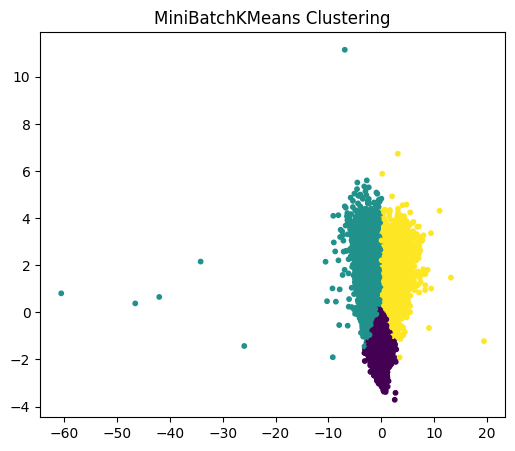

In [69]:
plt.figure(figsize=(6,5))
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_train, s=10)
plt.title("MiniBatchKMeans Clustering")
plt.show()

In [70]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2)
dbscan.fit(data_pca)

,eps,0.2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


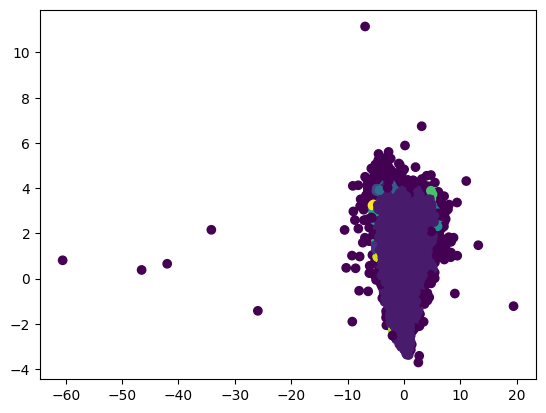

In [71]:
y_train=dbscan.labels_
plt.scatter(data_pca[:,0],data_pca[:,1],c=dbscan.labels_)

In [72]:

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{-1: 314,
 0: 53292,
 1: 8,
 2: 6,
 3: 17,
 4: 15,
 5: 7,
 6: 12,
 7: 11,
 8: 8,
 9: 8,
 10: 4,
 11: 7,
 12: 5,
 13: 5}

In [73]:
score = silhouette_score(data_pca, y_train)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.15820275167110692


In [13]:
y_train = kmeans.labels_

In [14]:
train_clusters = pd.DataFrame(df, columns=features)
train_clusters['Cluster'] = y_train
# cluster_summary = train_clusters.groupby('Cluster').mean()
# cluster_summary
df['Cluster']=train_clusters['Cluster']
df[['carat','cut_encoded','price','Cluster']].groupby('Cluster').mean()

,carat,cut_encoded,price
Cluster,,,
0,0.550663,3.606493,2407.138146
1,0.962582,2.486526,5060.803960
2,1.044572,2.144872,5392.427801


In [15]:
df[['carat','cut_encoded','price','Cluster']].groupby('Cluster').median()

,carat,cut_encoded,price
Cluster,,,
0,0.42,4.0,1168.0
1,1.00,3.0,3960.0
2,1.01,2.0,4398.0


In [17]:
final_df=df[['carat','cut_encoded','clarity_encoded','color_encoded','table','x','y','z','Cluster']]

In [20]:
final_df[final_df['Cluster']==1]

,carat,cut_encoded,clarity_encoded,color_encoded,table,x,y,z,Cluster
1,0.21,3.0,2.0,1.0,61.0,3.89,3.84,2.31,1
2,0.23,1.0,4.0,1.0,65.0,4.05,4.07,2.31,1
9,0.23,2.0,4.0,4.0,61.0,4.00,4.05,2.39,1
12,0.22,3.0,2.0,2.0,61.0,3.88,3.84,2.33,1
14,0.20,3.0,1.0,1.0,62.0,3.79,3.75,2.27,1
...,...,...,...,...,...,...,...,...,...
53928,0.79,3.0,1.0,1.0,58.0,6.03,5.96,3.68,1
53931,0.71,3.0,2.0,2.0,62.0,5.74,5.73,3.43,1
53932,0.70,2.0,3.0,1.0,59.0,5.71,5.76,3.47,1
53933,0.70,2.0,3.0,1.0,59.0,5.69,5.72,3.49,1


In [95]:
final_df_sorted = final_df.sort_values(by='z', ascending=True)
final_df_sorted

,carat,cut_encoded,clarity_encoded,color_encoded,table,x,y,z,Cluster
14635,1.07,4.0,2.0,2.0,57.0,6.62,6.67,1.07,1
21654,1.41,4.0,4.0,4.0,56.0,7.31,7.22,1.41,1
20694,1.53,4.0,2.0,5.0,54.0,7.43,7.50,1.53,1
39246,0.38,4.0,5.0,1.0,56.0,4.71,4.68,2.06,1
31592,0.20,3.0,3.0,1.0,60.0,3.81,3.78,2.24,1
...,...,...,...,...,...,...,...,...,...
25440,2.50,0.0,1.0,3.0,57.0,8.36,8.29,5.58,0
22004,2.52,0.0,0.0,3.0,57.0,8.39,8.33,5.60,0
26194,2.01,0.0,1.0,3.0,56.0,7.89,7.84,6.16,0
24067,2.00,3.0,1.0,4.0,57.0,8.09,58.90,8.06,1


In [ ]:
'''
Cluster 2 --> "Affordable Small Diamonds"
Cluster 1 --> "Mid-Range Balanced Diamonds"
Cluster 0 --> "Premium Heavy Diamonds"
'''

In [16]:
import joblib

joblib.dump(ss, "cluscaler.pkl")
joblib.dump(pca, "clupca.pkl")
# joblib.dump(gmm, "clugmm.pkl")
joblib.dump(kmeans, "clukmeans.pkl")


['clukmeans.pkl']